# NSE Stock Analysis (2000–2021)

This notebook analyzes stock performance of select NSE-listed companies — Cipla, HDFC, Reliance, and TCS — using historical data from 2000 to 2021. The aim is to answer a set of SMART questions covering consistency of returns, market stress behavior, risk-adjusted performance, and more.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## Loading Data

In [2]:
cipla = pd.read_csv('CIPLA.csv')
hdfc = pd.read_csv('HDFC.csv')
reliance = pd.read_csv('RELIANCE.csv')
tcs = pd.read_csv('TCS.csv')

In [3]:
cipla.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [4]:
cipla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [5]:
hdfc.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [6]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [7]:
reliance.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [8]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [9]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [10]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

### Note on TCS Data Availability:
The historical stock data for TCS begins from 25th August 2004, unlike the other companies (CIPLA, HDFC, and RELIANCE) which have data starting from the year 2000. This means that for TCS, our analysis (including returns, volatility, and other time-based metrics) will be based on a shorter time frame — from 2004 to 2021, instead of the full 2000–2021 period. This limitation should be considered when making direct comparisons across all four companies.

## Data Cleaning and Column Selection
We are keeping only the essential columns required for return and volatility analysis: Date, Close, and Symbol. These are sufficient to calculate daily returns, annualized return, annualized volatility, moving averages, maximum drawdown, and Sharpe ratio. Columns like Open, High, Low, Last, VWAP, Turnover, Trades, Deliverable Volume, and %Deliverable are removed as they are not needed for our current analysis focused on price-based return metrics.

Note: All cleaning and column selection operations are performed on the in-memory DataFrame only; the original CSV files remain unchanged to preserve the raw data for any future reference.

In [11]:
# Define the essential columns
columns_to_keep = ['Date', 'Symbol', 'Close']

def clean_stock_data(df):
    """
    Cleans and prepares stock data for analysis.

    - Keeps only the essential columns: Date, Symbol, Close
    - Converts Date to datetime format
    - Sorts the data chronologically

    Parameters:
    - df (DataFrame): Raw stock data

    Returns:
    - DataFrame: Cleaned and sorted stock data
    """
    df = df[columns_to_keep].copy()
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.sort_values('Date').reset_index(drop=True)
    return df

# Apply cleaning
cipla = clean_stock_data(cipla)
hdfc = clean_stock_data(hdfc)
reliance = clean_stock_data(reliance)
tcs = clean_stock_data(tcs)

In [12]:
print(cipla.dtypes)
print(hdfc.dtypes)
print(reliance.dtypes)
print(tcs.dtypes)

Date      datetime64[ns]
Symbol            object
Close            float64
dtype: object
Date      datetime64[ns]
Symbol            object
Close            float64
dtype: object
Date      datetime64[ns]
Symbol            object
Close            float64
dtype: object
Date      datetime64[ns]
Symbol            object
Close            float64
dtype: object


In [13]:
print(cipla.head())
print(hdfc.head())
print(reliance.head())
print(tcs.head())

        Date Symbol    Close
0 2000-01-03  CIPLA  1457.35
1 2000-01-04  CIPLA  1465.25
2 2000-01-05  CIPLA  1435.05
3 2000-01-06  CIPLA  1355.85
4 2000-01-07  CIPLA  1247.55
        Date Symbol   Close
0 2000-01-03   HDFC  293.50
1 2000-01-04   HDFC  304.05
2 2000-01-05   HDFC  292.80
3 2000-01-06   HDFC  296.45
4 2000-01-07   HDFC  286.55
        Date    Symbol   Close
0 2000-01-03  RELIANCE  251.70
1 2000-01-04  RELIANCE  271.85
2 2000-01-05  RELIANCE  282.50
3 2000-01-06  RELIANCE  294.35
4 2000-01-07  RELIANCE  314.55
        Date Symbol   Close
0 2004-08-25    TCS  987.95
1 2004-08-26    TCS  979.00
2 2004-08-27    TCS  962.65
3 2004-08-30    TCS  986.75
4 2004-08-31    TCS  988.10


With the cleaned dataset containing only the essential columns (Date, Close, and Symbol), we are now ready to begin our return and volatility analysis.

Our goal is to compute key performance metrics such as daily returns, annualized return, annualized volatility, Sharpe ratio, and maximum drawdown. These indicators will help us objectively compare the risk and consistency of returns for each stock between 2000 and 2021 (or from the available start date in case of TCS).

## SMART Question 1: Return and Risk Analysis

**Question:** Which company among CIPLA, HDFC, RELIANCE, and TCS delivered the most consistent returns from 2000 to 2021, based on annualized return and standard deviation?

### Why it matters:
This question helps evaluate how reliably a stock performs over the long term. Investors want to know not just how much a stock grew, but **how stable** that growth was. A high return with low volatility indicates a **more consistent performer**.

### Metrics We Calculate:
- **Daily Return** – Measures day-to-day price fluctuation
- **Annualized Return** – Shows average yearly growth rate
- **Annualized Volatility (Standard Deviation)** – Captures year-to-year price swings (risk)

### How It Helps:
By comparing both return and volatility, we identify which stocks are **high-growth**, **high-risk**, or **stable with steady gains**.

In [14]:
# Calculate Daily Return
cipla['Daily Return'] = cipla['Close'].pct_change()
hdfc['Daily Return'] = hdfc['Close'].pct_change()
reliance['Daily Return'] = reliance['Close'].pct_change()
tcs['Daily Return'] = tcs['Close'].pct_change()

In [15]:
print(cipla.head())
print(hdfc.head())
print(reliance.head())
print(tcs.head())

        Date Symbol    Close  Daily Return
0 2000-01-03  CIPLA  1457.35           NaN
1 2000-01-04  CIPLA  1465.25      0.005421
2 2000-01-05  CIPLA  1435.05     -0.020611
3 2000-01-06  CIPLA  1355.85     -0.055190
4 2000-01-07  CIPLA  1247.55     -0.079876
        Date Symbol   Close  Daily Return
0 2000-01-03   HDFC  293.50           NaN
1 2000-01-04   HDFC  304.05      0.035945
2 2000-01-05   HDFC  292.80     -0.037000
3 2000-01-06   HDFC  296.45      0.012466
4 2000-01-07   HDFC  286.55     -0.033395
        Date    Symbol   Close  Daily Return
0 2000-01-03  RELIANCE  251.70           NaN
1 2000-01-04  RELIANCE  271.85      0.080056
2 2000-01-05  RELIANCE  282.50      0.039176
3 2000-01-06  RELIANCE  294.35      0.041947
4 2000-01-07  RELIANCE  314.55      0.068626
        Date Symbol   Close  Daily Return
0 2004-08-25    TCS  987.95           NaN
1 2004-08-26    TCS  979.00     -0.009059
2 2004-08-27    TCS  962.65     -0.016701
3 2004-08-30    TCS  986.75      0.025035
4 2004-08-

In [16]:
def calculate_annual_metrics(df):
    """
    Calculates annualized return and annualized volatility for a stock.

    - Computes daily returns
    - Calculates total return over full period
    - Annualizes return and volatility based on trading days

    Parameters:
    - df (DataFrame): Clean stock data with 'Date' and 'Close'

    Returns:
    - Tuple:
        - annualized_return (float)
        - annualized_volatility (float)
    """
    df = df.sort_values('Date').copy()  # Ensure sorted by date

    # Calculate Daily Returns
    df['Daily Return'] = df['Close'].pct_change()

    # Annualized Return
    total_return = df['Close'].iloc[-1] / df['Close'].iloc[0] - 1
    years = (df['Date'].iloc[-1] - df['Date'].iloc[0]).days / 365
    annualized_return = (1 + total_return) ** (1 / years) - 1

    # Annualized Volatility
    daily_std = df['Daily Return'].std()
    annualized_volatility = daily_std * np.sqrt(252)

    return annualized_return, annualized_volatility

In [17]:
cipla_return, cipla_volatility = calculate_annual_metrics(cipla)
hdfc_return, hdfc_volatility = calculate_annual_metrics(hdfc)
reliance_return, reliance_volatility = calculate_annual_metrics(reliance)
tcs_return, tcs_volatility = calculate_annual_metrics(tcs)

print(f"CIPLA: Return = {cipla_return:.2%}, Volatility = {cipla_volatility:.2%}")
print(f"HDFC: Return = {hdfc_return:.2%}, Volatility = {hdfc_volatility:.2%}")
print(f"RELIANCE: Return = {reliance_return:.2%}, Volatility = {reliance_volatility:.2%}")
print(f"TCS: Return = {tcs_return:.2%}, Volatility = {tcs_volatility:.2%}")

CIPLA: Return = -2.18%, Volatility = 38.71%
HDFC: Return = 10.39%, Volatility = 41.42%
RELIANCE: Return = 10.19%, Volatility = 38.15%
TCS: Return = 6.96%, Volatility = 37.69%


### Key Observations:
- HDFC delivered the highest annualized return (10.39%) but also had the highest volatility (41.42%), indicating higher reward but also higher risk.
- Reliance followed closely with a similar return (10.19%) and slightly lower volatility, suggesting a more balanced risk-reward profile.
- TCS provided a moderate return (6.96%) with the lowest volatility (37.69%) among the four, making it potentially attractive for conservative investors.
- CIPLA had a negative annualized return (-2.18%) despite high volatility, indicating poor performance over the long term with significant price fluctuations.

### Conclusion:
Among the four companies, Reliance appears to offer the most consistent performance with a strong return and relatively moderate volatility. CIPLA, on the other hand, underperformed and was the least consistent in delivering returns during the period analyzed.

<hr>

## SMART Question 2: Market Stress Response Using Moving Averages

**Question:** How did each company’s 30-day moving average behave during major market stress periods (e.g., 2008 crisis, 2016 demonetization, 2020 COVID crash)?

### Why it matters:
This reveals how each stock responded to extreme economic events. A stock's **price behavior during crises** can reflect investor trust, business resilience, and long-term viability — crucial insights for risk management.

### What We Do:
- Plot 30-Day Moving Averages to smooth volatility
- Analyze price movement **before, during, and after** each crisis
- Compare stability and recovery across events

### How It Helps:
Understanding how companies behave under pressure shows which are **defensive**, **cyclical**, or **prone to panic selling**. It's key for building robust portfolios.

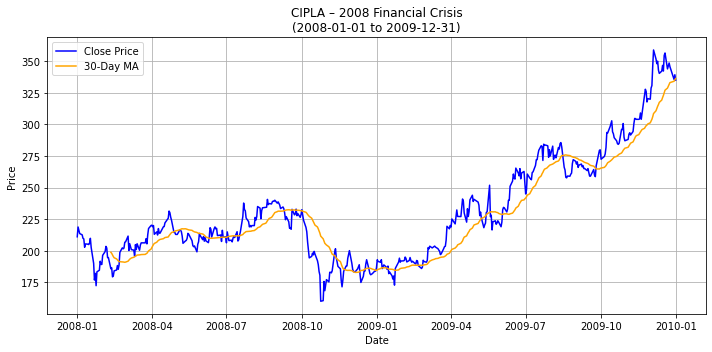

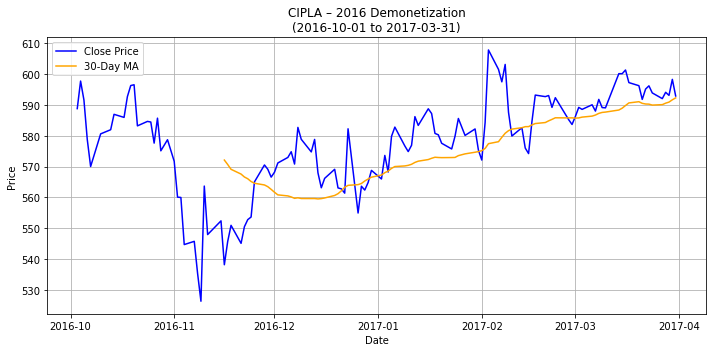

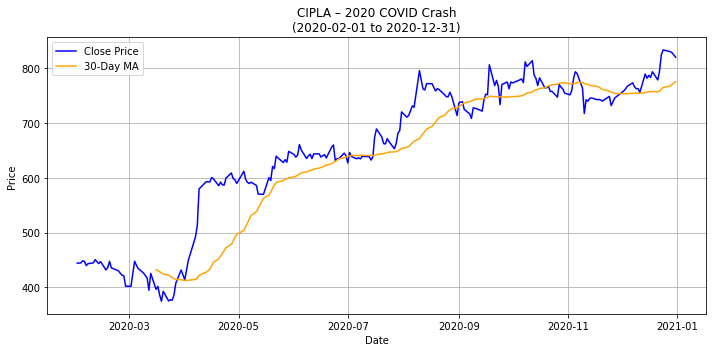

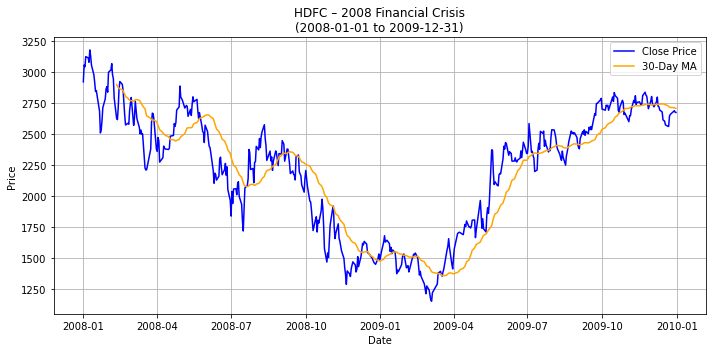

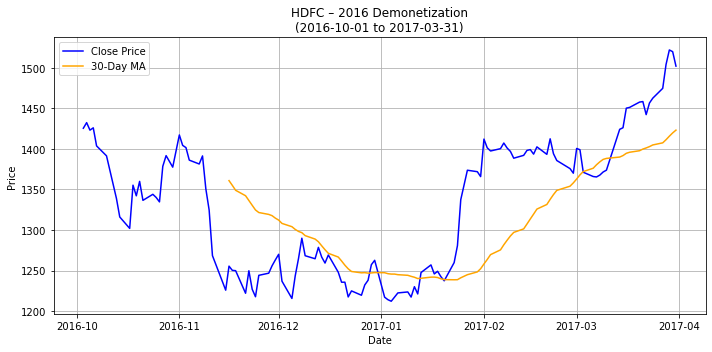

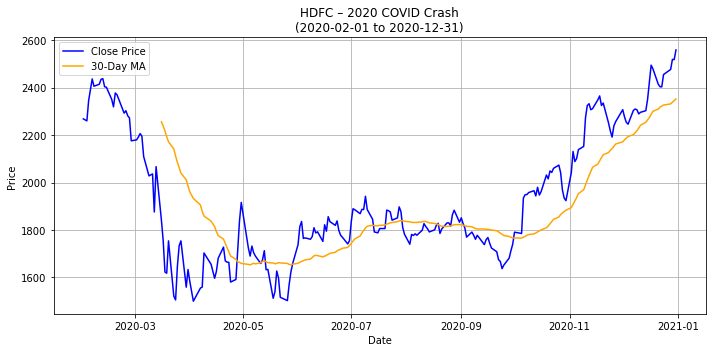

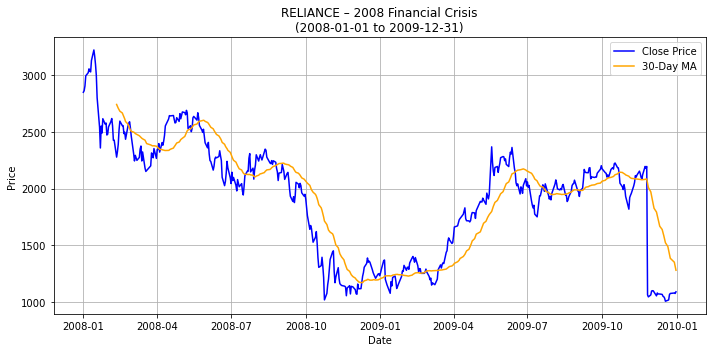

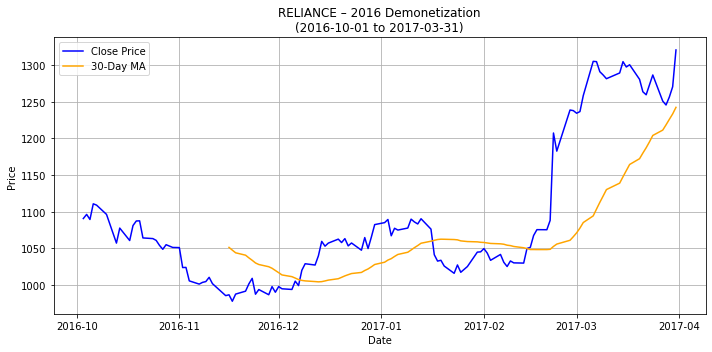

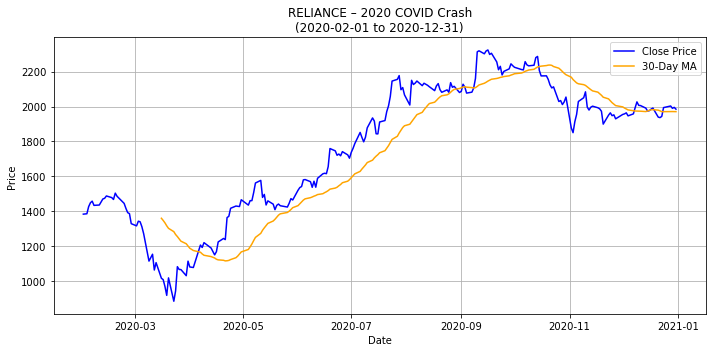

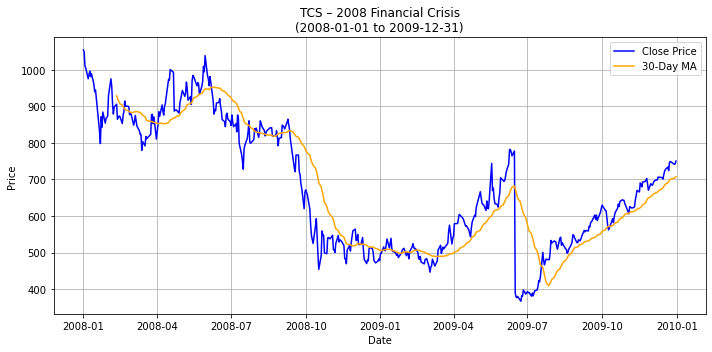

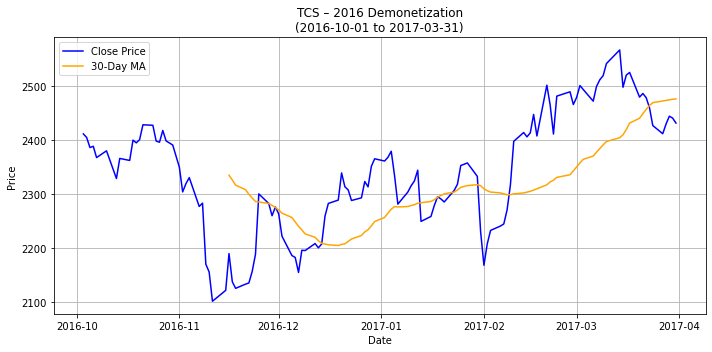

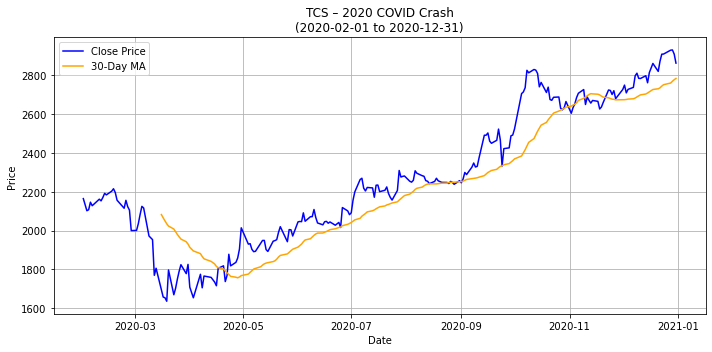

In [18]:
# Define your company DataFrames in a dictionary
companies = {
    'CIPLA': cipla,
    'HDFC': hdfc,
    'RELIANCE': reliance,
    'TCS': tcs
}

# Define event names and their corresponding date windows
events = {
    '2008 Financial Crisis': ('2008-01-01', '2009-12-31'),
    '2016 Demonetization': ('2016-10-01', '2017-03-31'),
    '2020 COVID Crash': ('2020-02-01', '2020-12-31')
}

def plot_moving_average(df, company_name, event_name, start_date, end_date):
    """
    Plots stock's Close price and 30-Day Moving Average for a given event period.

    Parameters:
    - df (DataFrame): Clean stock data
    - company_name (str): Name of the company
    - event_name (str): Name of the market event
    - start_date (str): Event start date (YYYY-MM-DD)
    - end_date (str): Event end date (YYYY-MM-DD)

    Output:
    - Displays a Matplotlib line plot
    """
    df_event = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
    df_event['30DMA'] = df_event['Close'].rolling(window=30).mean()

    plt.figure(figsize=(10, 5))
    plt.plot(df_event['Date'], df_event['Close'], label='Close Price', color='blue')
    plt.plot(df_event['Date'], df_event['30DMA'], label='30-Day MA', color='orange')
    plt.title(f'{company_name} – {event_name}\n({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loop through each company and each event to generate plots
for company_name, df in companies.items():
    for event_name, (start_date, end_date) in events.items():
        plot_moving_average(df, company_name, event_name, start_date, end_date)

### Key Observations:
1. 2008 Financial Crisis (Jan 2008 – Dec 2009)
    - CIPLA: Price fell sharply from ~₹250 in early 2008 to a low near ₹175 in early 2009. The 30DMA mirrored this trend with a delayed but smooth descent, indicating sustained weakness through most of 2008.

    - HDFC: Price dropped from ~₹2,300 in Jan 2008 to around ₹1,250 by the end of 2008. The 30DMA showed a consistent downward slope, confirming a strong bearish trend and a slow start to recovery into 2009.

    - RELIANCE: Price plunged from above ₹3,000 to around ₹1,000 by late 2008. A steep and prolonged dip was visible, with the moving average sharply declining before stabilizing in 2009.

    - TCS: Declined from ~₹860 in Sept. 2008 to ~₹460 in Oct. 2008. The 30DMA followed a gradual curve downward, suggesting steady but less violent impact compared to others.

2. 2016 Demonetization (Oct 2016 – Mar 2017)
    - CIPLA: Price dropped briefly below ₹530 in November, then rebounded above ₹580 within two months. The 30DMA showed a slight dip but remained stable overall.

    - HDFC: Sharp drop from ~₹1,330 to ~₹1,100 in November. However, quick recovery began by January 2017. The 30DMA confirmed a short-term dip followed by a steady rebound.

    - RELIANCE: Price barely moved; remained around ₹1,000–₹1,050 throughout. The 30DMA stayed steady, showing negligible impact from the event.

    - TCS: Minor fluctuation from ₹2,300 to ₹2,150, followed by quick normalization. The 30DMA was almost unaffected.

3. 2020 COVID Crash (Feb 2020 – Dec 2020)
    - CIPLA: Dropped sharply from ~₹470 to ₹360 in March 2020, then rebounded quickly to ₹650+ by July. The moving average captured the rebound after a short lag.

    - HDFC: Dropped from ~₹2,400 to ~₹1,500 in March. Unlike a clean V-shape, the recovery was gradual, with the 30DMA reflecting a slower upward slope.

    - RELIANCE: Declined from ~₹1,500 to ~₹875 in March, then surged to ₹2,200+ by August, marking the fastest recovery among peers. The 30DMA followed suit with a sharp upward shift.

    - TCS: Dropped modestly from ~₹2,270 to ₹1,650 in March, then steadily climbed back above ₹2,800 by year-end. The 30DMA remained stable, showing low volatility throughout.

### Conclusion
All four companies reacted differently to each economic event, but the 30-day moving average consistently revealed the underlying trends while smoothing out short-term fluctuations.

- RELIANCE showed the strongest post-crash recovery, especially during COVID.
- TCS consistently maintained the most stable price behavior, with limited volatility in all three events.
- HDFC was significantly impacted in 2008 and 2020 but displayed strong recovery capability.
- CIPLA was moderately affected, especially in 2008, but recovered quickly from the COVID crash.

This analysis highlights how moving averages help assess a stock’s behavior during volatile periods and offer a more objective lens for evaluating resilience and trend strength.

<hr>

## SMART Question 3: Maximum Drawdown and Recovery Time

**Question:** What was the maximum drawdown for each stock between 2000 and 2021, and how long did it take to recover?

### Why it matters:
Maximum drawdown reveals the **worst-case scenario** an investor might face if they bought at a peak. It reflects downside risk and helps investors understand the **patience** needed for recovery.

### Metrics We Calculate:
- **Maximum Drawdown (MDD)** – Largest drop from peak to trough
- **Recovery Duration** – How long it took to return to the previous high

### How It Helps:
This helps assess each company’s **risk resilience** and long-term price recovery, critical for investors with limited risk tolerance or long holding periods.

In [19]:
def calculate_max_drawdown(df):
    
    """
    Calculates the maximum drawdown and recovery time for a stock.

    - Finds the largest drop from peak to trough
    - Identifies recovery date if peak is revisited

    Parameters:
    - df (DataFrame): Clean stock data with 'Date' and 'Close'

    Returns:
    - dict: {
        'Max Drawdown (%)': float,
        'Peak Date': date,
        'Trough Date': date,
        'Recovery Date': date or "Not Recovered",
        'Recovery Duration (days)': int or "Not Recovered"
      }
    """
    df = df.sort_values('Date').reset_index(drop=True)
    peak_price = df['Close'].iloc[0]
    peak_date = df['Date'].iloc[0]
    max_drawdown = 0
    trough_date = df['Date'].iloc[0]
    recovery_date = None

    for i in range(1, len(df)):
        current_price = df['Close'].iloc[i]
        current_date = df['Date'].iloc[i]

        # Update peak if new high
        if current_price > peak_price:
            peak_price = current_price
            peak_date = current_date

        # Check for drawdown
        drawdown = (current_price - peak_price) / peak_price
        if drawdown < max_drawdown:
            max_drawdown = drawdown
            trough_date = current_date
            drawdown_peak = peak_price
            drawdown_peak_date = peak_date

    # Find recovery date AFTER trough
    trough_index = df[df['Date'] == trough_date].index[0]
    recovery_date = None
    for j in range(trough_index + 1, len(df)):
        if df['Close'].iloc[j] >= drawdown_peak:
            recovery_date = df['Date'].iloc[j]
            break

    recovery_duration = (
        (recovery_date - drawdown_peak_date).days if recovery_date else "Not Recovered"
    )

    return {
        'Max Drawdown (%)': round(max_drawdown * 100, 2),
        'Peak Date': drawdown_peak_date.date(),
        'Trough Date': trough_date.date(),
        'Recovery Date': recovery_date.date() if recovery_date else "Not Recovered",
        'Recovery Duration (days)': recovery_duration,
    }

In [20]:
cipla_mdd = calculate_max_drawdown(cipla)
hdfc_mdd = calculate_max_drawdown(hdfc)
reliance_mdd = calculate_max_drawdown(reliance)
tcs_mdd = calculate_max_drawdown(tcs)

print("CIPLA:", cipla_mdd)
print("HDFC:", hdfc_mdd)
print("RELIANCE:", reliance_mdd)
print("TCS:", tcs_mdd)


CIPLA: {'Max Drawdown (%)': -89.07, 'Peak Date': datetime.date(2000, 1, 4), 'Trough Date': datetime.date(2008, 10, 24), 'Recovery Date': 'Not Recovered', 'Recovery Duration (days)': 'Not Recovered'}
HDFC: {'Max Drawdown (%)': -81.47, 'Peak Date': datetime.date(2008, 1, 9), 'Trough Date': datetime.date(2011, 2, 8), 'Recovery Date': 'Not Recovered', 'Recovery Duration (days)': 'Not Recovered'}
RELIANCE: {'Max Drawdown (%)': -79.01, 'Peak Date': datetime.date(2008, 1, 14), 'Trough Date': datetime.date(2012, 5, 16), 'Recovery Date': 'Not Recovered', 'Recovery Duration (days)': 'Not Recovered'}
TCS: {'Max Drawdown (%)': -82.06, 'Peak Date': datetime.date(2006, 5, 4), 'Trough Date': datetime.date(2009, 6, 23), 'Recovery Date': datetime.date(2013, 9, 2), 'Recovery Duration (days)': 2678}


### Maximum Drawdown Summary (2000–2021)

| Company   | Max Drawdown (%) | Peak Date  | Trough Date | Recovery Date    | Recovery Time          |
|-----------|------------------|------------|-------------|------------------|------------------------|
| CIPLA     | -89.07%          | 2000-01-04 | 2008-10-24  | Not Recovered    | Not Recovered          |
| HDFC      | -81.47%          | 2008-01-09 | 2011-02-08  | Not Recovered    | Not Recovered          |
| RELIANCE  | -79.01%          | 2008-01-14 | 2012-05-16  | Not Recovered    | Not Recovered          |
| TCS       | -82.06%          | 2006-05-04 | 2009-06-23  | 2013-09-02       | 2678 days (~7.3 years) |


### Key Observations (Max Drawdown and Recovery)
- CIPLA experienced the deepest drawdown of −89.07% starting from January 2000, hitting its trough in October 2008. The stock never recovered to its original peak by 2021.

- HDFC peaked in early 2008 and fell by −81.47% by 2011. Despite a strong recovery attempt, it also did not regain its 2008 peak by the end of the dataset.

- RELIANCE faced a drawdown of −79.01% from its 2008 peak to its 2012 low and never fully recovered to its earlier high within the timeframe.

- TCS is the only company that fully recovered: after an −82.06% drop from its 2006 peak to its 2009 trough, it returned to the same peak level by September 2013, taking 2678 days (~7.3 years).

### Conclusion
Maximum drawdown analysis reveals the worst-case loss an investor could face and tests a stock’s resilience over time. Among all four companies:

- TCS showed remarkable recovery strength and long-term investor confidence.

- The other three — CIPLA, HDFC, and RELIANCE — demonstrate that even strong stocks can remain below previous highs for over a decade.

- This highlights why maximum drawdown and recovery metrics are essential for evaluating long-term downside risk, holding power, and the patience required in equity investing.

<hr>

## SMART Question 4: Monthly Return and Volatility

**Question:** How does the average monthly return and volatility of each company compare, and what does this imply about risk-reward trade-offs?

### Why it matters:
Monthly analysis gives a **granular view** of performance. It helps distinguish stocks that offer **steady growth** from those that are **erratic or aggressive**.

### What We Calculate:
- **Average Monthly Return** – % change in closing prices month-over-month
- **Monthly Volatility** – Standard deviation of daily returns in each month

### How It Helps:
This reveals which stocks are **smooth performers**, **high flyers**, or **volatile bets** — helping align picks with investor risk preferences.

In [21]:
def monthly_return_volatility(df):
    """
    Calculates average monthly return and volatility for a stock.

    - Groups closing prices by month and computes % change
    - Calculates monthly standard deviation of daily returns

    Parameters:
    - df (DataFrame): Clean stock data with 'Date', 'Close', and 'Daily Return'

    Returns:
    - dict: {
        'Avg Monthly Return (%)': float,
        'Avg Monthly Volatility (%)': float
      }
    """
    df = df.copy()
    df['Month'] = df['Date'].dt.to_period('M')
    
    # Monthly return: % change in last closing price of each month
    monthly_price = df.groupby('Month')['Close'].last()
    monthly_return = monthly_price.pct_change().dropna()
    
    # Monthly volatility: std dev of daily returns in each month
    daily_returns = df[['Date', 'Daily Return']].dropna()
    daily_returns['Month'] = daily_returns['Date'].dt.to_period('M')
    monthly_volatility = daily_returns.groupby('Month')['Daily Return'].std()

    # Get average return and volatility
    avg_return = round(monthly_return.mean() * 100, 2)
    avg_volatility = round(monthly_volatility.mean() * 100, 2)

    return {
        'Avg Monthly Return (%)': avg_return,
        'Avg Monthly Volatility (%)': avg_volatility
    }

In [22]:
cipla_monthly = monthly_return_volatility(cipla)
hdfc_monthly = monthly_return_volatility(hdfc)
reliance_monthly = monthly_return_volatility(reliance)
tcs_monthly = monthly_return_volatility(tcs)

print("CIPLA:", cipla_monthly)
print("HDFC:", hdfc_monthly)
print("RELIANCE:", reliance_monthly)
print("TCS:", tcs_monthly)

CIPLA: {'Avg Monthly Return (%)': 0.77, 'Avg Monthly Volatility (%)': 1.95}
HDFC: {'Avg Monthly Return (%)': 1.5, 'Avg Monthly Volatility (%)': 2.14}
RELIANCE: {'Avg Monthly Return (%)': 1.24, 'Avg Monthly Volatility (%)': 2.05}
TCS: {'Avg Monthly Return (%)': 1.12, 'Avg Monthly Volatility (%)': 1.92}


### Average Monthly Return vs Volatility (2000–2021)

| Company   | Avg Monthly Return (%) | Avg Monthly Volatility (%) |
|-----------|------------------------|-----------------------------|
| CIPLA     | 0.77%                  | 1.95%                       |
| HDFC      | 1.50%                  | 2.14%                       |
| RELIANCE  | 1.24%                  | 2.05%                       |
| TCS       | 1.12%                  | 1.92%                       |


### Key Observations
- HDFC offered the highest average monthly return (1.50%), but also had the highest volatility (2.14%), indicating strong performance at the cost of more risk.

- TCS had the lowest volatility (1.92%) while still maintaining a healthy return (1.12%), suggesting a more stable performance with relatively lower risk.

- RELIANCE showed a good balance of return (1.24%) and moderate volatility (2.05%).

- CIPLA had the lowest return (0.77%) but not the lowest volatility, indicating a weaker risk-reward profile compared to others.

### Conclusion
Among the four stocks, HDFC delivered the highest average monthly return but with the highest volatility, indicating a higher-risk, higher-reward profile. TCS offered the most stable performance with the lowest volatility and consistent returns, making it suitable for risk-averse investors. RELIANCE struck a balanced middle ground, while CIPLA underperformed in both return and stability, suggesting a weaker risk-return trade-off.

<hr>

## SMART Question 5: Risk-Adjusted Return (Sharpe Ratio)

**Question:** Which company offered the best risk-adjusted return (Sharpe Ratio) over the two decades?

### Why it matters:
The Sharpe Ratio compares return **relative to risk**. A stock might offer high returns, but is it worth the volatility? This metric reveals the **efficiency** of return — essential for strategic investment decisions.

### What We Calculate:
- **Sharpe Ratio** = (Average Monthly Return – Risk-Free Rate) / Monthly Volatility
- We assume a **0.4% monthly risk-free rate** (~5% annual)

### How It Helps:
It helps investors prioritize stocks that deliver **more return per unit of risk**, which is key for building **optimized portfolios**.

In [23]:
def calculate_sharpe_ratio(avg_return, avg_volatility, risk_free_rate=0.004):
    """
    Calculates the Sharpe Ratio.
    
    Parameters:
    - avg_return: average monthly return (in decimal)
    - avg_volatility: average monthly std dev (in decimal)
    - risk_free_rate: assumed risk-free return per month (default: 0.4% or 0.004)
    
    Returns:
    - float: Sharpe Ratio rounded to 2 decimal places
    """
    sharpe_ratio = (avg_return - risk_free_rate) / avg_volatility
    return round(sharpe_ratio, 2)

In [24]:
cipla_sharpe = calculate_sharpe_ratio(0.0077, 0.0195)
hdfc_sharpe = calculate_sharpe_ratio(0.0150, 0.0214)
reliance_sharpe = calculate_sharpe_ratio(0.0124, 0.0205)
tcs_sharpe = calculate_sharpe_ratio(0.0112, 0.0192)

print("CIPLA Sharpe:", cipla_sharpe)
print("HDFC Sharpe:", hdfc_sharpe)
print("RELIANCE Sharpe:", reliance_sharpe)
print("TCS Sharpe:", tcs_sharpe)

CIPLA Sharpe: 0.19
HDFC Sharpe: 0.51
RELIANCE Sharpe: 0.41
TCS Sharpe: 0.38


### Key Observations
- HDFC had the highest Sharpe Ratio (0.51), meaning it delivered the best return relative to the risk taken.

- RELIANCE followed with a Sharpe of 0.41, showing a solid balance between return and volatility.

- TCS came next with 0.38 — a strong performer with low volatility but slightly lower relative return.

- CIPLA, with a Sharpe Ratio of just 0.19, offered the least efficient risk-adjusted return.

### Conclusion
HDFC delivered the most favorable risk-adjusted performance among the four stocks, making it the top choice from a Sharpe Ratio perspective. CIPLA lagged behind, while TCS and RELIANCE offered strong, balanced profiles — ideal for investors valuing both growth and stability.

<hr>

## Final Comparative Summary – Which Stock is Best for What Type of Investor?

Based on our five SMART questions covering returns, volatility, drawdowns, risk-adjusted metrics, and stress-period behavior, we scored each company from **1 (best)** to **4 (worst)** for each metric.

### Scoring Breakdown (Lower Total Score = Better)

| SMART Question                  | Metric                             | CIPLA | HDFC | RELIANCE | TCS  |
|--------------------------------|------------------------------------|-------|------|----------|------|
| 1. Consistency                 | Annualized Return + Low Volatility | 4     | 1    | 2        | 3    |
| 2. Stress Events               | Stability + Recovery Behavior      | 3     | 2    | 1        | 1    |
| 3. Drawdown                   | Lowest MDD & Recovered             | 4     | 3    | 2        | 1    |
| 4. Monthly Return & Volatility | Avg Monthly Return vs Risk         | 4     | 1    | 2        | 3    |
| 5. Sharpe Ratio                | Risk-Adjusted Return               | 4     | 1    | 2        | 3    |
| **Total Score (Lower is Better)** |                                    | **19**| **8**| **9**    | **11**|

---

### Final Ranking Summary

| Rank | Company   | Total Score | Investor Profile                        |
|------|-----------|-------------|-----------------------------------------|
| 🥇 1 | **HDFC**      | 8           | Growth-Oriented: High return, higher risk |
| 🥈 2 | **RELIANCE**  | 9           | Balanced: Moderate return and risk        |
| 🥉 3 | **TCS**       | 11          | Conservative: Low volatility, steady return |
| 🚩 4 | **CIPLA**     | 19          | Speculative: Poor performance, high risk    |

---

### Insights by Profile

- **HDFC** is ideal for investors seeking high-growth opportunities and willing to handle volatility.
- **RELIANCE** offers a strong balance between return and risk.
- **TCS** suits conservative investors focused on consistency and stability.
- **CIPLA** underperformed across metrics and is suited only for speculative strategies or turnaround believers.

---

### Next Steps (ACT Phase)

- Revisit the analysis with post-2021 data to check for recovery or trend shifts.
- Integrate **fundamentals** (e.g., PE ratio, revenue growth, dividend yield).
- Expand the scope to include other NIFTY50 stocks or sector-based comparisons.
- Use this project as a foundational portfolio piece and a launchpad for deeper financial analytics.

---

This concludes the core analysis of this stock comparison case study.
